# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv("data/titanic.csv")

# Exploratory Data Analysis

## Inspecting Data

In [3]:
# explore head of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Shape of Data

In [4]:
print("Shape of titanic data (Rows, Colums): ", df.shape)

Shape of titanic data (Rows, Colums):  (418, 12)


## Describe Data

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Columns

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Types

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Missing Values in each Column

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Conclusion
- Only two columns Age and Cabin have missing values
- We will just drop Cabin column because it has a lot of missing values
- We will fill the missing values in Age column as it has less missing values

In [9]:
# drop cabin column
df.drop(columns=['Cabin'], inplace=True)

# fill missing values in age column using interpolation method
df.interpolate(inplace=True)

# print number of missing values in age column
print("Missing Values in Age: ", df.Age.isnull().sum())

Missing Values in Age:  0


## Value Counts in Survived Column

In [10]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

- 266 people didn't survived (represented with 0)
- 152 people survived (represented with 1)

## Analysis by Pclass

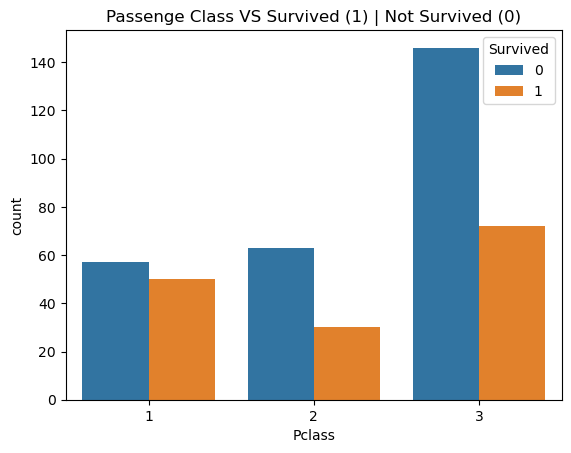

In [11]:
sns.countplot(data=df, x='Pclass', hue='Survived');
plt.title("Passenge Class VS Survived (1) | Not Survived (0)");

- Survival probabilty of Pclasses
    - 3 > 1 > 2
- Not survival probability of Pclasses
    - 3 > 2 > 1

## analysis by gender / Sex

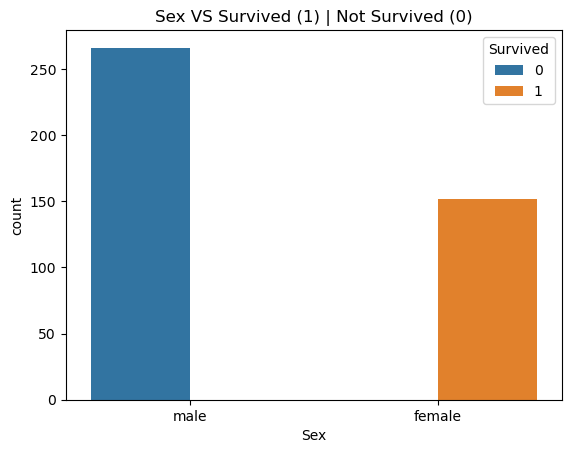

In [12]:
sns.countplot(data=df, x='Sex', hue='Survived');
plt.title("Sex VS Survived (1) | Not Survived (0)");

### Conclusion
- Survived people are all female
- No male have survived the titanic

## Analysis by Embarked Column

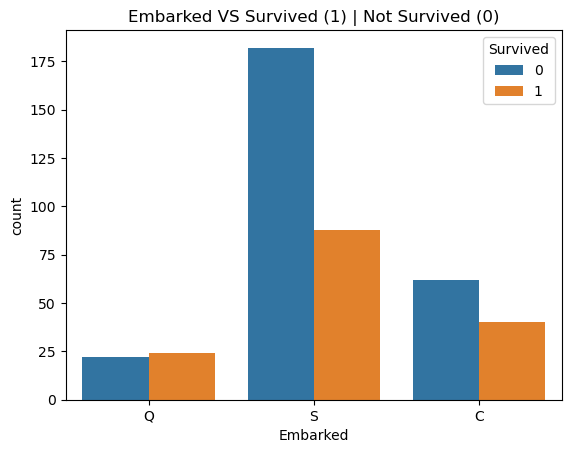

In [13]:
sns.countplot(data=df, x='Embarked', hue='Survived');
plt.title("Embarked VS Survived (1) | Not Survived (0)");

- Survival Probability
    - S > C > Q
- Not Survival Probability
    - S > C > Q

## Remove Unnecessary Columns
- "Ticket" and "PassengerID" have no contriute to target variable (Survived), so we can remove them.
- We can preprocess "Name" but here I am droping it just for my easyness.

In [14]:
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


## Data Transformation
- "Sex" and "Embarked" are categorical variables. We can map them to Numerical values.

In [15]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,2
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,2
4,1,3,1,22.0,1,1,12.2875,2


In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

### All the features are now numeric

## Correlation between columns

In [18]:
corr_matrix = df.corr()

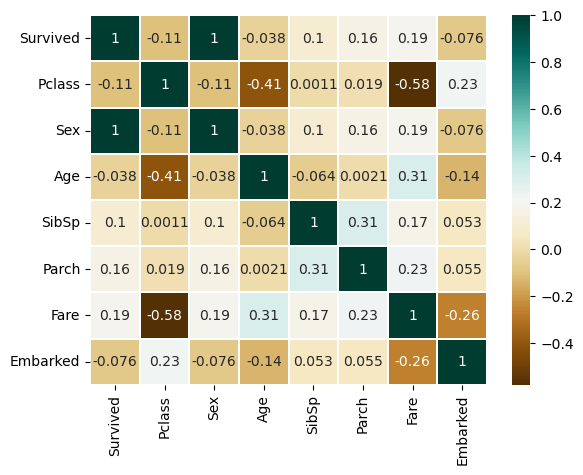

In [19]:
sns.heatmap(data=corr_matrix, cmap="BrBG", annot=True, linewidths=0.2);

# Model Training

## Split data into features and target

In [20]:
X = df.drop(columns=['Survived'])
y = pd.DataFrame({'Survived': df['Survived'].values})

# print shape of X and y
print("Features (X) Shape: ", X.shape)
print('Target (y) Shape: ', y.shape)

Features (X) Shape:  (418, 7)
Target (y) Shape:  (418, 1)


## train_test_split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Scaling Data using Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Classification Algorithm: KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []

# try a range of K nearest neighbors (1,10)
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.values.ravel())
    score = knn.score(X_test_scaled, y_test)
    accuracy.append(score)
    
    # print accuracy for current K neighbors
    print(f"For K = {k}: {score:.3f}")

For K = 1: 0.976
For K = 2: 0.976
For K = 3: 0.976
For K = 4: 0.976
For K = 5: 0.976
For K = 6: 0.976
For K = 7: 0.988
For K = 8: 0.988
For K = 9: 0.988
For K = 10: 0.988


### Conclusion
- For K = 7, KNN gives highest accuracy

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train.values.ravel())

train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")

Train Score: 1.00
Test Score: 0.99


### Conclusion
- KNN gives 100% accuracy over train data
- It looks like KNN is overfitting
- Let's try decision trees and see what happens

## Classification Algorithm: Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# I am using default parameters for DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) # training with unscaled data

train_score_dt = dt.score(X_train, y_train)
test_score_dt = dt.score(X_test, y_test)

print(f"Train Score of Decision Tree: {train_score_dt:.2f}")
print(f"Test Score of Decision Tree: {test_score_dt:.2f}")

Train Score of Decision Tree: 1.00
Test Score of Decision Tree: 1.00


- Decision Tree gives 100 % accuracy over both train and test data.

In [26]:
# Let's print depth of tree
print("Decision Tree Depth: ", dt.get_depth())

Decision Tree Depth:  1


## Conclusion
- As we can see the depth of the Decision Tree is 1
- It means there is only one feature that Decision Tree is using to predict Survival
- Refer to "Analysis by Sex", all females servived but no male survived.